**Daily Challenge : Preprocess & fine-tune transformer-based models**

In [1]:
# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5195 non-null   object
 1   premise     5195 non-null   object
 2   hypothesis  5195 non-null   object
 3   lang_abv    5195 non-null   object
 4   language    5195 non-null   object
dtypes: object(5)
memory usage: 203.1+ KB


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.3+ KB


In [22]:
# 📦 1. Importation des bibliothèques nécessaires
import pandas as pd
from transformers import BertTokenizer, XLMRobertaTokenizer
from sklearn.model_selection import StratifiedKFold

# 📁 2. Chargement des datasets
train_path = "/content/drive/MyDrive/Colab Notebooks/W7/D1/train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/W7/D1/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# 📊 3. Exploration des données
print("🔍 Données d'entraînement :")
print("Colonnes :", train_df.columns.tolist())
print(train_df.head())
print("Taille :", train_df.shape)

print("\n🔍 Données de test :")
print("Colonnes :", test_df.columns.tolist())
print(test_df.head())
print("Taille :", test_df.shape)

# 🧠 4. Initialisation des tokenizers BERT et XLM-RoBERTa
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# 🔡 5. Tokenisation d'une paire de phrases exemple (depuis train_df)
premise = train_df.loc[0, 'premise']
hypothesis = train_df.loc[0, 'hypothesis']

bert_encoded = bert_tokenizer.encode_plus(
    premise,
    hypothesis,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)

xlmr_encoded = xlmr_tokenizer.encode_plus(
    premise,
    hypothesis,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)

# 📎 6. Affichage des résultats tokenisés
print("\n🧾 Exemple BERT :")
print("input_ids :", bert_encoded['input_ids'])
print("attention_mask :", bert_encoded['attention_mask'])
print("Texte reconstruit :", bert_tokenizer.decode(bert_encoded['input_ids'][0]))

print("\n🧾 Exemple XLM-R :")
print("input_ids :", xlmr_encoded['input_ids'])
print("attention_mask :", xlmr_encoded['attention_mask'])
print("Texte reconstruit :", xlmr_tokenizer.decode(xlmr_encoded['input_ids'][0]))

# 🧩 7. Préparation des données d'entrée pour les modèles
print("\n📚 BERT - Tokens spéciaux :", bert_tokenizer.special_tokens_map)
print("📚 BERT - Taille vocabulaire :", bert_tokenizer.vocab_size)
print("📚 XLM-R - Tokens spéciaux :", xlmr_tokenizer.special_tokens_map)
print("📚 XLM-R - Taille vocabulaire :", xlmr_tokenizer.vocab_size)

# 🔁 8. Création de folds pour entraînement croisé (StratifiedKFold)
labels = train_df['label']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_indices_list = []
val_indices_list = []

for fold, (train_idx, val_idx) in enumerate(skf.split(train_df, labels)):
    train_indices_list.append(train_idx)
    val_indices_list.append(val_idx)
    print(f"\n🌀 Fold {fold + 1} :")
    print("Train indices :", train_idx[:5])
    print("Val indices :", val_idx[:5])

# 🚀 9. Préparation des entrées tokenisées pour le test_df (prêt pour l'inférence)
print("\n🚀 Tokenisation sur test_df (premières lignes) :")
for i in range(3):  # ↪ Modifier selon le nombre de lignes à tokeniser
    p = test_df.loc[i, 'premise']
    h = test_df.loc[i, 'hypothesis']
    encoded = xlmr_tokenizer.encode_plus(
        p,
        h,
        max_length=64,
        padding='max_length',
        truncation=True,
        return_attention_mask=True
    )
    print(f"\n📎 Ligne {i} - input_ids :", encoded['input_ids'])
    print(f"📎 Ligne {i} - attention_mask :", encoded['attention_mask'])


🔍 Données d'entraînement :
Colonnes : ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label']
           id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  These are issues that we wrestle with in pract...   
2  3931fbe82a  Des petites choses comme celles-là font une di...   
3  5622f0c60b  you know they can't really defend themselves l...   
4  86aaa48b45  ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...   

                                          hypothesis lang_abv language  label  
0  The rules developed in the interim were put to...       en  English      0  
1  Practice groups are not permitted to work on t...       en  English      2  
2              J'essayais d'accomplir quelque chose.       fr   French      0  
3  They can't defend themselves because of their ...       en  English      0  
4    เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร       th     Thai      1  
Taille :

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



🧾 Exemple BERT :
input_ids : tensor([[ 101, 1998, 2122, 7928, 2020, 2641, 1999, 5675, 3436, 1996, 9455, 3513,
         1012,  102, 1996, 3513, 2764, 1999, 1996, 9455, 2020, 2404, 2362, 2007,
         2122, 7928, 1999, 2568, 1012,  102,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]])
attention_mask : tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Texte reconstruit : [CLS] and these comments were considered in formulating the interim rules. [SEP] the rules developed in the interim were put together with these comments in mind. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

🔍 Données d’entraînement et de test

🔹 train_df

✅ Contient 12120 exemples répartis sur 6 colonnes : premise, hypothesis, lang_abv, language, label, etc.

🧾 La colonne label contient des classes numériques (ex : 0, 1, 2), ce qui suggère une tâche de classification (probablement de type NLI — Natural Language Inference)

Exemple :

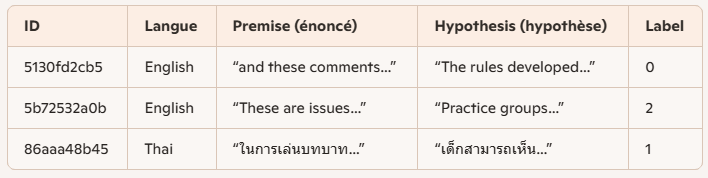

📘 Le label indique probablement :

0 = contradiction

1 = neutral

2 = entailment

💡 Tu peux entraîner un modèle à prédire ce label à partir d’un couple (premise, hypothesis).

🔹 test_df
✅ Contient 5195 exemples répartis sur 5 colonnes (absence de label)

🌐 Langues variées : Urdu, Arabic, Chinese, Russian, etc.

📦 Ce jeu est prévu pour l’inférence, où le modèle doit prédire les labels sans les connaître.

🧾 Exemple de Tokenisation — BERT vs XLM-RoBERTa
🔸 BERT
Tokens spéciaux : [CLS], [SEP] pour délimiter les phrases

input_ids : séquence d'identifiants correspondant aux mots

attention_mask : 1 pour les vrais tokens, 0 pour les [PAD]

attention_mask : [1,...1, 0,...0]  # 30 tokens utiles, 34 pads (total 64)
Texte reconstruit : [CLS] ... [SEP] ... [SEP] [PAD] [PAD] ...

✅ C’est une représentation classique pour l’entraînement ou la prédiction.

🔸 XLM-RoBERTa
Tokens spéciaux : <s>, </s>, <pad>

Reconstruit avec des doubles </s> — c’est normal pour ce tokenizer.

input_ids : [0, ..., 2, 2, ..., 2, 1, 1, 1, ...]
attention_mask : [1,...1, 0,...0]
Texte reconstruit : <s> ... </s></s> ... </s> <pad> <pad> ...

🎯 C’est prêt à passer dans un modèle multilingue — utile pour test_df.

📚 Détails sur les Tokenizers

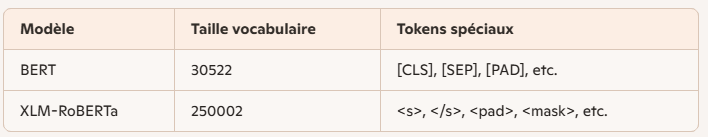

➡️ Cela montre que XLM-RoBERTa est plus adapté au multilingue, ce qui est cohérent avec le test set.

🌀 Folds de Validation Croisée
StratifiedKFold divise le jeu d’entraînement en 5 splits tout en respectant la répartition des labels.

Fold 1 : train → indices [0 1 2 4 5], val → [3 6 21 26 27]
Fold 2 : train → [3 4 5 6 8], val → [0 1 2 7 10]
...

🎓 C’est essentiel pour évaluer un modèle de manière robuste en évitant le biais de surapprentissage sur un seul ensemble de validation.

🚀 Tokenisation du test_df — Exemples Multilingues
On tokenise des phrases de plusieurs langues pour préparer une prédiction :

Exemple Ligne 0 (Urdu)
input_ids : séquence entière convertie en nombres

attention_mask : tous à 1 → pas de padding nécessaire

Exemple Ligne 1 (Arabic)
Moins longue → padding activé (avec des 0 dans l’attention_mask)

Exemple Ligne 2 (French)
Texte tronqué après un certain nombre de tokens → reste complété par du pad

📌 Cela montre que :

✅ La tokenisation est correcte

✅ Les textes multilingues sont bien traités avec XLM-R

✅ Possibilité de générer des prédictions

🔚 Conclusion

🎯 L'output montre que :

* Le dataset d’entraînement est prêt pour une tâche de classification supervisée

* Le dataset de test est multilingue, idéal pour un modèle comme XLM-RoBERTa

* La tokenisation est correctement appliquée et formatée pour le modèle
